In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean

mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble =r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 ''')
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

%matplotlib inline

In [37]:
PATH= '/results2/SalishSea/nowcast-green.201905/'
modver='HC1905'
start_date = dt.datetime(2013,1,1)
end_date = dt.datetime(2017,1,1)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}
rematch=False
if rematch==True:
    df1=et.loadDFOCTD()
    df1.head()

In [38]:
# saveloc='./'
# fname=f'data_DFOCTD_{modver}_{start_date.strftime("%Y%m%d")}_{end_date.strftime("%Y%m%d")}'
# if rematch==True:
#     data=et.matchData(df1,filemap, fdict, start_date, end_date, namfmt, PATH, flen)
#     pickle.dump(data,open(os.path.join(saveloc,fname)+'.pkl','wb'))
# else:
#     data=pickle.load(open(os.path.join(saveloc,fname)+'.pkl','rb'))

In [39]:
#data=pickle.load(open(os.path.join(saveloc,fname)+'.pkl','rb'))

In [40]:
# data = pd.read_csv('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/data_DFOCTD_HC1905_20130101_20170101.csv')

In [41]:
# print(data.head())

In [42]:
def rotmap(lon,lat,lon0,lat0,phi):
    # rotate around point (pick one near center of domain)
    # phi in degrees
    # first scale lats to match and center around lat0,lon0:
    lon1=(lon-lon0)*np.cos(lat0*np.pi/180)
    lat1=lat-lat0
    # now rotate:
    lon2=lon1*np.cos(phi*np.pi/180)-lat1*np.sin(phi*np.pi/180)
    lat2=lon1*np.sin(phi*np.pi/180)+lat1*np.cos(phi*np.pi/180)
    return lon2,lat2

In [43]:
cm1=cmocean.cm.thermal
#plt.get_cmap('PuBuGn')
#cm1=cmo.cm.matter
theta=-30
lon0=-123.9
lat0=49.3
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])
blon,blat=rotmap(bathylon,bathylat,lon0,lat0,theta)

In [44]:
# cver = "BIO"
# clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
# cfile = {2013:"BIO_clno_5_2013_reass.pkl",2014:"BIO_clno_5_2014_reass.pkl", 
#          2015: "BIO_clno_5_2015_reass.pkl", 2016: "BIO_clno_5_2016_reass.pkl"}
# cxf='Xcoords_for571_stations.pkl'
# cyf='Ycoords_for571_stations.pkl'
# print('Cluster version is:', cver)
# # papermill reads dictionary keys as strings, so add code to correct this
# cfile2=dict()
# for key,val in cfile.items():
#     cfile2[int(key)]=val
# cfile=cfile2
# cx=pickle.load(open(clusterD+cxf, 'rb'))
# cy=pickle.load(open(clusterD+cyf, 'rb'))
# cf=dict()
# for iyear in cfile.keys():
#     cf[iyear]=pickle.load(open(clusterD+cfile[iyear],'rb'))

# def round2(num):
#     return int(np.trunc((num+2)/10)*10+2)

# data['Cluster']=np.zeros(len(data))
# for ir, row in data.iterrows():
#     if (ir%5000 == 0):
#         print(ir)
#     ii=(cx==round2(row['i']))&(cy==round2(row['j']))
#     if sum(ii)==1:
#         cluster=cf[row['Year']][ii]
#         data.at[ir,'Cluster']=int(cluster)

In [45]:
# tdir = '/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/'
# w = pd.read_csv(tdir+'data_DFOCTD_HC1905_20130101_20170101.csv')
# print(w.head())

# np.nanmin(w['Year'])

In [46]:
fname2=f'data_2013in_DFOCTD_byCLUST_{modver}_{start_date.strftime("%Y%m%d")}_{end_date.strftime("%Y%m%d")}'
#pickle.dump(data,open(os.path.join(saveloc,fname2)+'.pkl','wb'))

In [47]:
saveloc='./'
data=pickle.load(open(os.path.join(saveloc,fname2)+'.pkl','rb'))

In [48]:
print(data.head())

     Year  Month   Day       Hour        Lat      Lon         Z         SA  \
0  2013.0    1.0  10.0  17.118056  49.329667 -124.081  0.892338  27.814801   
1  2013.0    1.0  10.0  17.118056  49.329667 -124.081  1.883821  27.826002   
2  2013.0    1.0  10.0  17.118056  49.329667 -124.081  2.974446  27.842222   
3  2013.0    1.0  10.0  17.118056  49.329667 -124.081  4.065065  27.901148   
4  2013.0    1.0  10.0  17.118056  49.329667 -124.081  4.957386  28.036150   

         CT  Fluor                dtUTC    j    i  mod_vosaline  mod_votemper  \
0  6.753649    NaN  2013-01-10 17:07:05  526  206     28.452301      7.408990   
1  6.762110    NaN  2013-01-10 17:07:05  526  206     28.452488      7.410102   
2  6.764341    NaN  2013-01-10 17:07:05  526  206     28.452883      7.411254   
3  6.812357    NaN  2013-01-10 17:07:05  526  206     28.454327      7.413784   
4  6.874438    NaN  2013-01-10 17:07:05  526  206     28.454327      7.413784   

   k  Cluster  
0  0      3.0  
1  1      3.

In [49]:
y_ar = np.arange(0,31,1)
print(y_ar)
bins=[y_ar,y_ar]



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


/home/tjarniko/conda_envs/pyelise/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7078: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None
/home/tjarniko/conda_envs/pyelise/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7078: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None
/home/tjarniko/conda_envs/pyelise/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7078: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


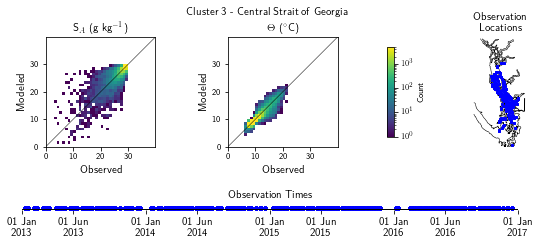

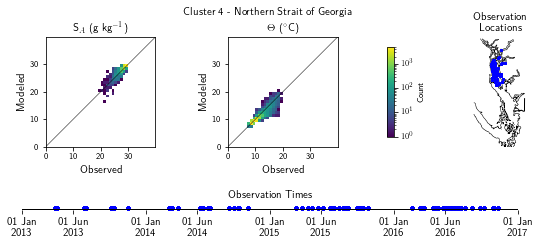

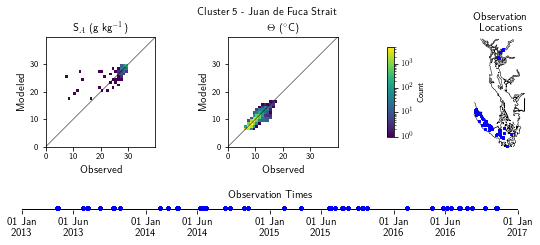

In [79]:
clnams = ['No match', 'Tidal Mixing', 'Nearshore',\
          'Central Strait of Georgia', 'Northern Strait of Georgia', 'Juan de Fuca Strait']
fs = 11
theseclust = [3,4,5]
#theseclust = [3]
for ic in theseclust:
    clnam = clnams[int(ic)]
    bounds = np.array([0,5,10,15,20,40,100,200,450])
    norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    #pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
    tm=40
    sm=40

    fig = plt.figure(figsize = (8.1,3.2))
    gsv = gridspec.GridSpec(2,1,left=.08,right=.98,hspace=1,bottom=.1,top=.85,height_ratios=[4,.2])
    gs1=gridspec.GridSpecFromSubplotSpec(1,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
                                         width_ratios=[1,1,.05,.05,.6])
    axSA = fig.add_subplot(gs1[0])
    axCT = fig.add_subplot(gs1[1])
    axLmap = fig.add_subplot(gs1[-1])

    gscb = gridspec.GridSpecFromSubplotSpec(11,1,subplot_spec=gs1[2])
    axcb = fig.add_subplot(gscb[1:-1])

    axL=fig.add_subplot(gsv[1])

    axSA.plot((0,sm),(0,sm),'k-',lw=.5)
    axCT.plot((0,tm),(0,tm),'k-',lw=.5)

    vm0=-150
    args={'marker':'.','s':2,'norm':norm}
    dataCl=data.loc[(data.Cluster==ic)]
    #ps=et.varvarScatter(axSA,dataCl,'SA','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
    #ps=et.varvarScatter(axCT,dataCl,'CT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
    
    iiT=(~np.isnan(dataCl['CT']))&(~np.isnan(dataCl['mod_votemper']))
    iiS=(~np.isnan(dataCl['SA']))&(~np.isnan(dataCl['mod_vosaline']))
    counts, xedges, yedges, m1=axCT.hist2d(dataCl.loc[iiT,['CT']].values.flatten(),
                                          dataCl.loc[iiT,['mod_votemper']].values.flatten(),bins=[y_ar,y_ar],norm=LogNorm(vmin=1,vmax=5*10**3),
                                           cmin=1,cmax=1*10**20)
    counts, xedges, yedges, m2=axSA.hist2d(dataCl.loc[iiS,['SA']].values.flatten(),
                                          dataCl.loc[iiS,['mod_vosaline']].values.flatten(),bins=[y_ar,y_ar],norm=LogNorm(vmin=1,vmax=5*10**3),
                                           cmin=1,cmax=1*10**20)
    cb=fig.colorbar(m1,cax=axcb)
    cb.set_label('Count')
    #cb.set_ylim(0,450)

    ntick=np.arange(0,sm,int(sm/4))
    ntickl=[str(i) for i in ntick]
    for ax in (axSA,):
        ax.set_xlim((0,sm))
        ax.set_ylim((0,sm))
        ax.set_xticks(ntick)
        ax.set_xticklabels(ntickl)
        ax.set_yticks(ntick)
        ax.set_yticklabels(ntickl)

    stick=np.arange(0,tm,int(tm/4))
    stickl=[str(i) for i in stick]
    for ax in (axCT,):
        ax.set_xlim((0,tm))
        ax.set_ylim((0,tm))
        ax.set_xticks(stick)
        ax.set_xticklabels(stickl)
        ax.set_yticks(stick)
        ax.set_yticklabels(stickl)


    for ax in (axSA,axCT,):
        ax.set_aspect(1, adjustable='box')
        #ax.set_xlabel('Observed')

    axSA.set_ylabel('Modeled',fontsize=11)
    axCT.set_ylabel('Modeled',fontsize=11)
    axSA.set_xlabel('Observed',fontsize=11)
    axCT.set_xlabel('Observed',fontsize=11)


    axSA.set_title('S$_A$ (g kg$^{-1}$)',fontsize=11)
    axCT.set_title('$\Theta$ ($^{\circ}$C)',fontsize=11)

    #viz_tools.set_aspect(axLmap)
    for axLi in (axLmap,):
        axLi.set_aspect(1, adjustable='box')
        contour_lines = axLi.contour(blon,blat,bathyZ,[1e-5],
                    colors='black',zorder=2,linewidths=.5)
        axLi.set_xlim(-1.02,0.81)
        axLi.set_ylim(-1.5,1.8)
        axLi.axis('off')
    dataTSCl=dataCl.loc[(dataCl.SA>=0)|(dataCl.CT>=0)]

    dataTSCl=dataCl.loc[(dataCl.SA>=0)|(dataCl.CT>=0)]
    np_dataTSCl = (dataTSCl.dtUTC.to_numpy(dtype = 'datetime64'))
    datezeros = np.zeros_like(np_dataTSCl)
    
    lons15,lats15=rotmap(dataTSCl['Lon'], dataTSCl['Lat'],lon0,lat0,theta)
    axLmap.plot(lons15,lats15, '.',color='blue',markersize=2)
    axLmap.set_title('Observation\nLocations',fontsize=11)

    axL.set_title('Observation Times',fontsize=11)
    p1a,=axL.plot(np_dataTSCl,datezeros,'.',color='blue',markersize=6)
    #p1a,=axL.plot(dataTSCl.dtUTC,np.zeros(np.shape(dataTSCl.dtUTC)),'.',color='blue',markersize=6)
    axL.set_yticks(());
    
    
    axL.xaxis.set_ticks([dt.datetime(2013,1,1), dt.datetime(2013,6,1),
                        dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                         dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                         dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                         dt.datetime(2017,1,1)])
    
     
    #labels=axL.xaxis.get_ticklabels()
    #'01 Jan \n2013','01 Jun \n2013',\
    labels = ['01 Jan \n2013','01 Jun \n2013',\
              '01 Jan \n2014','01 Jun \n2014',\
              '01 Jan \n2015','01 Jun \n2015','01 Jan \n2016','01 Jun \n2016',
              '01 Jan \n2017']
    
    axL.xaxis.set_ticklabels(labels, fontsize = fs)
    axL.set_xlim(dt.datetime(2013,1,1),dt.datetime(2017,1,1))
    axL.set_ylim(-.1,.3)
    axLpos=axL.get_position()
    new = mpl.transforms.Bbox.from_bounds(axLpos.bounds[0],axLpos.bounds[1],axLpos.bounds[2]-.05,axLpos.bounds[3])
    axL.set_position(new)
    #axL.legend(handles=[p1,p2,p3],loc=8,ncol=3,bbox_to_anchor=[.5,-4])
    axL.set_frame_on(False)
    #axL.axes.get_yaxis().set_visible(False)
    #axL.axes.get_xaxis().set_visible(True)
    xmin, xmax = axL.get_xaxis().get_view_interval()
    ymin, ymax = axL.get_yaxis().get_view_interval()
    axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
#     fig.suptitle('Cluster '+str(ic))
    fig.suptitle(f'Cluster {str(int(ic))} - {clnam}', fontsize = 11)
    #fig.savefig(f'/data/eolson/results/MEOPAR/figs/eval/dfoCTDEval{modver}_Cluster{int(ic)}.png',dpi=200,transparent=True)

/home/tjarniko/conda_envs/pyelise/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7078: RuntimeWarning: invalid value encountered in greater
  h[h > cmax] = None


Text(0.5, 0.98, 'All Data')

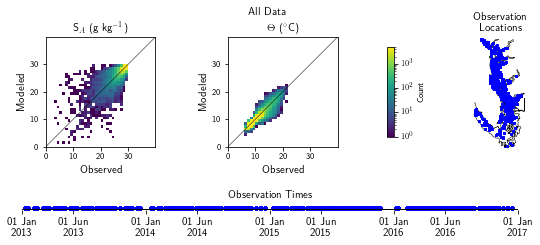

In [80]:
clnams = ['No match', 'Tidal Mixing', 'Nearshore',\
          'Central Strait of Georgia', 'Northern Strait of Georgia', 'Juan de Fuca Strait']
fs = 11

bounds = np.array([0,5,10,15,20,40,100,200,450])
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
#pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
tm=40
sm=40

fig = plt.figure(figsize = (8.1,3.2))
gsv = gridspec.GridSpec(2,1,left=.08,right=.98,hspace=1,bottom=.1,top=.85,height_ratios=[4,.2])
gs1=gridspec.GridSpecFromSubplotSpec(1,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
                                     width_ratios=[1,1,.05,.05,.6])
axSA = fig.add_subplot(gs1[0])
axCT = fig.add_subplot(gs1[1])
axLmap = fig.add_subplot(gs1[-1])

gscb = gridspec.GridSpecFromSubplotSpec(11,1,subplot_spec=gs1[2])
axcb = fig.add_subplot(gscb[1:-1])

axL=fig.add_subplot(gsv[1])

axSA.plot((0,sm),(0,sm),'k-',lw=.5)
axCT.plot((0,tm),(0,tm),'k-',lw=.5)

vm0=-150
args={'marker':'.','s':2,'norm':norm}
dataCl=data.loc[(data.Cluster<10)]
#ps=et.varvarScatter(axSA,dataCl,'SA','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
#ps=et.varvarScatter(axCT,dataCl,'CT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

iiT=(~np.isnan(dataCl['CT']))&(~np.isnan(dataCl['mod_votemper']))
iiS=(~np.isnan(dataCl['SA']))&(~np.isnan(dataCl['mod_vosaline']))
counts, xedges, yedges, m1=axCT.hist2d(dataCl.loc[iiT,['CT']].values.flatten(),
                                      dataCl.loc[iiT,['mod_votemper']].values.flatten(),bins=[y_ar,y_ar],norm=LogNorm(vmin=1,vmax=5*10**3),
                                       cmin=1,cmax=1*10**20)
counts, xedges, yedges, m2=axSA.hist2d(dataCl.loc[iiS,['SA']].values.flatten(),
                                      dataCl.loc[iiS,['mod_vosaline']].values.flatten(),bins=[y_ar,y_ar],norm=LogNorm(vmin=1,vmax=5*10**3),
                                       cmin=1,cmax=1*10**20)
cb=fig.colorbar(m1,cax=axcb)
cb.set_label('Count')
#cb.set_ylim(0,450)

ntick=np.arange(0,sm,int(sm/4))
ntickl=[str(i) for i in ntick]
for ax in (axSA,):
    ax.set_xlim((0,sm))
    ax.set_ylim((0,sm))
    ax.set_xticks(ntick)
    ax.set_xticklabels(ntickl)
    ax.set_yticks(ntick)
    ax.set_yticklabels(ntickl)

stick=np.arange(0,tm,int(tm/4))
stickl=[str(i) for i in stick]
for ax in (axCT,):
    ax.set_xlim((0,tm))
    ax.set_ylim((0,tm))
    ax.set_xticks(stick)
    ax.set_xticklabels(stickl)
    ax.set_yticks(stick)
    ax.set_yticklabels(stickl)


for ax in (axSA,axCT,):
    ax.set_aspect(1, adjustable='box')
    #ax.set_xlabel('Observed')

axSA.set_ylabel('Modeled',fontsize=11)
axCT.set_ylabel('Modeled',fontsize=11)
axSA.set_xlabel('Observed',fontsize=11)
axCT.set_xlabel('Observed',fontsize=11)


axSA.set_title('S$_A$ (g kg$^{-1}$)',fontsize=11)
axCT.set_title('$\Theta$ ($^{\circ}$C)',fontsize=11)

#viz_tools.set_aspect(axLmap)
for axLi in (axLmap,):
    axLi.set_aspect(1, adjustable='box')
    contour_lines = axLi.contour(blon,blat,bathyZ,[1e-5],
                colors='black',zorder=2,linewidths=.5)
    axLi.set_xlim(-1.02,0.81)
    axLi.set_ylim(-1.5,1.8)
    axLi.axis('off')
dataTSCl=dataCl.loc[(dataCl.SA>=0)|(dataCl.CT>=0)]

dataTSCl=dataCl.loc[(dataCl.SA>=0)|(dataCl.CT>=0)]
np_dataTSCl = (dataTSCl.dtUTC.to_numpy(dtype = 'datetime64'))
datezeros = np.zeros_like(np_dataTSCl)

lons15,lats15=rotmap(dataTSCl['Lon'], dataTSCl['Lat'],lon0,lat0,theta)
axLmap.plot(lons15,lats15, '.',color='blue',markersize=2)
axLmap.set_title('Observation\nLocations',fontsize=11)

axL.set_title('Observation Times',fontsize=11)
p1a,=axL.plot(np_dataTSCl,datezeros,'.',color='blue',markersize=6)
#p1a,=axL.plot(dataTSCl.dtUTC,np.zeros(np.shape(dataTSCl.dtUTC)),'.',color='blue',markersize=6)
axL.set_yticks(());


axL.xaxis.set_ticks([dt.datetime(2013,1,1), dt.datetime(2013,6,1),
                    dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                     dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                     dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                     dt.datetime(2017,1,1)])

#labels=axL.xaxis.get_ticklabels()
#'01 Jan \n2013','01 Jun \n2013',\
labels = ['01 Jan \n2013','01 Jun \n2013',\
          '01 Jan \n2014','01 Jun \n2014',\
          '01 Jan \n2015','01 Jun \n2015','01 Jan \n2016','01 Jun \n2016',
          '01 Jan \n2017']

axL.xaxis.set_ticklabels(labels, fontsize = fs)

axL.set_xlim(dt.datetime(2013,1,1),dt.datetime(2017,1,1))
axL.set_ylim(-.1,.3)
axLpos=axL.get_position()
new = mpl.transforms.Bbox.from_bounds(axLpos.bounds[0],axLpos.bounds[1],axLpos.bounds[2]-.05,axLpos.bounds[3])
axL.set_position(new)
#axL.legend(handles=[p1,p2,p3],loc=8,ncol=3,bbox_to_anchor=[.5,-4])
axL.set_frame_on(False)
#axL.axes.get_yaxis().set_visible(False)
#axL.axes.get_xaxis().set_visible(True)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
#     fig.suptitle('Cluster '+str(ic))
fig.suptitle(f'All Data', fontsize = 11)
#fig.savefig(f'/data/eolson/results/MEOPAR/figs/eval/dfoCTDEval{modver}_Cluster{int(ic)}.png',dpi=200,transparent=True)

2013-01-10T17:07:05.000


In [ ]:
clnams = ['No match', 'Tidal Mixing', 'Nearshore',\
      'Central Strait of Georgia', 'Northern Strait of Georgia', 'Juan de Fuca Strait']
fs = 11
#for ic in np.unique(data['Cluster']):
clnam = clnams[int(ic)]
bounds = np.array([0,5,10,15,20,40,100,200,450])
norm = mpl.colors.BoundaryNorm(boundaries=bounds, ncolors=256)
#pcm = ax[1].pcolormesh(X, Y, Z1, norm=norm, cmap='RdBu_r')
tm=40
sm=40

fig = plt.figure(figsize = (8.1,3.2))
gsv = gridspec.GridSpec(2,1,left=.08,right=.98,hspace=1,bottom=.1,top=.85,height_ratios=[4,.2])
gs1=gridspec.GridSpecFromSubplotSpec(1,5,subplot_spec=gsv[0],wspace=.3,hspace=.34,
                                     width_ratios=[1,1,.05,.05,.6])
axSA = fig.add_subplot(gs1[0])
axCT = fig.add_subplot(gs1[1])
axLmap = fig.add_subplot(gs1[-1])

gscb = gridspec.GridSpecFromSubplotSpec(11,1,subplot_spec=gs1[2])
axcb = fig.add_subplot(gscb[1:-1])

axL=fig.add_subplot(gsv[1])

axSA.plot((0,sm),(0,sm),'k-',lw=.5)
axCT.plot((0,tm),(0,tm),'k-',lw=.5)

vm0=-150
args={'marker':'.','s':2,'norm':norm}
dataCl=data.loc[(data.Cluster<10)]
#ps=et.varvarScatter(axSA,dataCl,'SA','mod_vosaline','Z',vmin=vm0,vmax=450,cm=cm1,args=args)
#ps=et.varvarScatter(axCT,dataCl,'CT','mod_votemper','Z',vmin=vm0,vmax=450,cm=cm1,args=args)

iiT=(~np.isnan(dataCl['CT']))&(~np.isnan(dataCl['mod_votemper']))
iiS=(~np.isnan(dataCl['SA']))&(~np.isnan(dataCl['mod_vosaline']))
counts, xedges, yedges, m1=axCT.hist2d(dataCl.loc[iiT,['CT']].values.flatten(),
                                      dataCl.loc[iiT,['mod_votemper']].values.flatten(),bins=[y_ar,y_ar],norm=LogNorm(vmin=1,vmax=5*10**3),
                                       cmin=1,cmax=5*10**3)
counts, xedges, yedges, m2=axSA.hist2d(dataCl.loc[iiS,['SA']].values.flatten(),
                                      dataCl.loc[iiS,['mod_vosaline']].values.flatten(),bins=[y_ar,y_ar],norm=LogNorm(vmin=1,vmax=5*10**3),
                                       cmin=1,cmax=5*10**3)
cb=fig.colorbar(m1,cax=axcb)
cb.set_label('Count')
#cb.set_ylim(0,450)

ntick=np.arange(0,sm,int(sm/4))
ntickl=[str(i) for i in ntick]
for ax in (axSA,):
    ax.set_xlim((0,sm))
    ax.set_ylim((0,sm))
    ax.set_xticks(ntick)
    ax.set_xticklabels(ntickl)
    ax.set_yticks(ntick)
    ax.set_yticklabels(ntickl)

stick=np.arange(0,tm,int(tm/4))
stickl=[str(i) for i in stick]
for ax in (axCT,):
    ax.set_xlim((0,tm))
    ax.set_ylim((0,tm))
    ax.set_xticks(stick)
    ax.set_xticklabels(stickl)
    ax.set_yticks(stick)
    ax.set_yticklabels(stickl)


for ax in (axSA,axCT,):
    ax.set_aspect(1, adjustable='box')
    #ax.set_xlabel('Observed')

axSA.set_ylabel('Modeled',fontsize=11)
axCT.set_ylabel('Modeled',fontsize=11)
axSA.set_xlabel('Observed',fontsize=11)
axCT.set_xlabel('Observed',fontsize=11)


axSA.set_title('S$_A$ (g kg$^{-1}$)',fontsize=11)
axCT.set_title('$\Theta$ ($^{\circ}$C)',fontsize=11)

#viz_tools.set_aspect(axLmap)
for axLi in (axLmap,):
    axLi.set_aspect(1, adjustable='box')
    contour_lines = axLi.contour(blon,blat,bathyZ,[1e-5],
                colors='black',zorder=2,linewidths=.5)
    axLi.set_xlim(-1.02,0.81)
    axLi.set_ylim(-1.5,1.8)
    axLi.axis('off')
dataTSCl=dataCl.loc[(dataCl.SA>=0)|(dataCl.CT>=0)]

lons15,lats15=rotmap(dataTSCl['Lon'], dataTSCl['Lat'],lon0,lat0,theta)
axLmap.plot(lons15,lats15, '.',color='blue',markersize=2)
axLmap.set_title('Observation\nLocations',fontsize=11)

axL.set_title('Observation Times',fontsize=11)
p1a,=axL.plot(dataTSCl.dtUTC,np.zeros(np.shape(dataTSCl.dtUTC)),'.',color='blue',markersize=6)
axL.set_yticks(());


axL.xaxis.set_ticks([
                     dt.datetime(2014,1,1), dt.datetime(2014,6,1),
                     dt.datetime(2015,1,1), dt.datetime(2015,6,1),
                     dt.datetime(2016,1,1), dt.datetime(2016,6,1),
                     dt.datetime(2017,1,1)])

#labels=axL.xaxis.get_ticklabels()
labels = ['01 Jan \n2014','01 Jun \n2014',\
          '01 Jan \n2015','01 Jun \n2015','01 Jan \n2016','01 Jun \n2016',
          '01 Jan \n2017']

axL.xaxis.set_ticklabels(labels, fontsize = fs)
#    yearsFmt = mdates.DateFormatter('%d %b %Y')
#    axL.xaxis.set_major_formatter(yearsFmt)

#     axL.xaxis.set_ticks([dt.datetime(2013,1,1),
#                          dt.datetime(2014,1,1),
#                          dt.datetime(2015,1,1),
#                          dt.datetime(2016,1,1), 
#                          dt.datetime(2017,1,1)])
#     #labels=axL.xaxis.get_ticklabels()
#     for tick in axL.get_xticklabels():
#             #tick.set_rotation(90)
#             tick.set_horizontalalignment('center')
axL.set_ylim(-.1,.3)
axLpos=axL.get_position()
new = mpl.transforms.Bbox.from_bounds(axLpos.bounds[0],axLpos.bounds[1],axLpos.bounds[2]-.05,axLpos.bounds[3])
axL.set_position(new)
#axL.legend(handles=[p1,p2,p3],loc=8,ncol=3,bbox_to_anchor=[.5,-4])
axL.set_frame_on(False)
#axL.axes.get_yaxis().set_visible(False)
#axL.axes.get_xaxis().set_visible(True)
xmin, xmax = axL.get_xaxis().get_view_interval()
ymin, ymax = axL.get_yaxis().get_view_interval()
axL.add_artist(mpl.lines.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))
#     fig.suptitle('Cluster '+str(ic))
fig.suptitle(f'All Data', fontsize = 11)
#fig.savefig(f'/data/eolson/results/MEOPAR/figs/eval/dfoCTDEval{modver}_Cluster{int(ic)}.png',dpi=200,transparent=True)

In [81]:
print('All temp:')
print('all:')
print('0= no cluster')
print(np.nanmean(data['mod_votemper'][(data.Cluster<10)]))
et.printstats(data,'CT','mod_votemper')
for icl in range(3,6):
    print('cluster',icl)
    print(np.nanmean(data['mod_votemper'][(data.Cluster==icl)]))
    et.printstats(data.loc[(data.Cluster==icl),:],'CT','mod_votemper')

All temp:
all:
0= no cluster
9.545490844115333
  N: 502228
  bias: 0.010178431286476552
  RMSE: 0.46745035689096087
  WSS: 0.9672925072485713
cluster 3
9.546364478120735
  N: 308314
  bias: 0.044213969612707515
  RMSE: 0.4375460617148877
  WSS: 0.9656761229462778
cluster 4
9.64745861910637
  N: 56479
  bias: -0.07533580886422797
  RMSE: 0.4539695548298178
  WSS: 0.9610839366393273
cluster 5
8.697154339582783
  N: 37858
  bias: -0.06848508347437665
  RMSE: 0.5107559175510206
  WSS: 0.9662152377158586


In [83]:
print('All sal:')
print('all:')
print('0= no cluster')
print(np.nanmean(data['mod_vosaline'][(data.Cluster<10)]))
et.printstats(data,'SA','mod_vosaline')
for icl in range(3,6):
    print('cluster',icl)
    print(np.nanmean(data['mod_vosaline'][(data.Cluster==icl)]))
    et.printstats(data.loc[(data.Cluster==icl),:],'SA','mod_vosaline')

All sal:
all:
0= no cluster
30.5651373119602
  N: 502228
  bias: 0.045717943413723816
  RMSE: 0.4742374269277998
  WSS: 0.9671108283088208
cluster 3
30.450706336988507
  N: 308314
  bias: 0.06617129494753371
  RMSE: 0.47804006410526206
  WSS: 0.9600506367611026
cluster 4
30.292262597091298
  N: 56479
  bias: 0.1478409393573905
  RMSE: 0.31551016706020135
  WSS: 0.970477478251466
cluster 5
32.32215399558243
  N: 37858
  bias: -0.06555684889193714
  RMSE: 0.4164683768852029
  WSS: 0.9710224920012441
